## Part 1 : Voronoi mesh generation

In [1]:
#!pip install -U mf6Voronoi

In [2]:
import warnings ## Org
warnings.filterwarnings('ignore') ## Org

import os, sys ## Org
import geopandas as gpd ## Org
from mf6Voronoi.geoVoronoi import createVoronoi ## Org
from mf6Voronoi.meshProperties import meshShape ## Org
from mf6Voronoi.utils import initiateOutputFolder, getVoronoiAsShp ## Org

In [3]:
#Create mesh object specifying the coarse mesh and the multiplier
vorMesh = createVoronoi(meshName='openPit', maxRef = 200, multiplier=2.5, overlapping=False) #<======= Insert

#Open limit layers and refinement definition layers
vorMesh.addLimit('basin','../shp/local/aoi.shp') ## Org
vorMesh.addLayer('faults','../shp/faults_v2.shp',1) #<======= Insert
vorMesh.addLayer('river','../shp/river_basin.shp',50) ## Org
vorMesh.addLayer('pit','../shp/minePlan/pitShell.shp',50) ## Org 
vorMesh.addLayer('regionalFlow','../shp/local/regionalFlow.shp',50)

In [4]:
#Generate point pair array
vorMesh.generateOrgDistVertices() ## Org

#Generate the point cloud and voronoi
vorMesh.createPointCloud() ## Org
vorMesh.generateVoronoi() ## Org

Follow us:,,,,,,



/--------Layer faults discretization-------/
Progressive cell size list: [1, 3.5, 9.75, 25.375, 64.4375, 162.09375] m.

/--------Layer river discretization-------/
Progressive cell size list: [50, 175.0] m.

/--------Layer pit discretization-------/
Progressive cell size list: [50, 175.0] m.

/--------Layer regionalFlow discretization-------/
Progressive cell size list: [50, 175.0] m.

/----Sumary of points for voronoi meshing----/
Distributed points from layers: 4
Points from layer buffers: 26874
Points from max refinement areas: 384
Points from min refinement areas: 629
Total points inside the limit: 35446
/--------------------------------------------/

Time required for point generation: 9.62 seconds 


/----Generation of the voronoi mesh----/

Time required for voronoi generation: 3.11 seconds 



In [5]:
vorMesh.checkVoronoiQuality(threshold=0.01)


/----Performing quality verification of voronoi mesh----/
Short side on polygon: 35445 with length = 0.00123
Short side on polygon: 35445 with length = 0.00123
Short side on polygon: 35445 with length = 0.00123
Short side on polygon: 35445 with length = 0.00123
Short side on polygon: 35445 with length = 0.00538
Short side on polygon: 35445 with length = 0.00538
Short side on polygon: 35445 with length = 0.00123
Short side on polygon: 35445 with length = 0.00123
Short side on polygon: 35445 with length = 0.00793
Short side on polygon: 35445 with length = 0.00793
Short side on polygon: 35445 with length = 0.00123
Short side on polygon: 35445 with length = 0.00123
Short side on polygon: 35445 with length = 0.00793
Short side on polygon: 35445 with length = 0.00793
Short side on polygon: 35445 with length = 0.00123
Short side on polygon: 35445 with length = 0.00123
Short side on polygon: 35445 with length = 0.00793
Short side on polygon: 35445 with length = 0.00793
Short side on polygon: 

In [6]:
vorMesh.fixVoronoiShortSides()
vorMesh.generateVoronoi()
vorMesh.checkVoronoiQuality(threshold=0.01)


/----Generation of the voronoi mesh----/

Time required for voronoi generation: 3.24 seconds 


/----Performing quality verification of voronoi mesh----/
Your mesh has no edges shorter than your threshold


In [7]:
#Export generated voronoi mesh
initiateOutputFolder('../output') ## Org
getVoronoiAsShp(vorMesh.modelDis, shapePath='../output/'+vorMesh.modelDis['meshName']+'.shp') ## Org

The output folder ../output exists and has been cleared

/----Generation of the voronoi shapefile----/

Time required for voronoi shapefile: 8.09 seconds 



<Axes: >

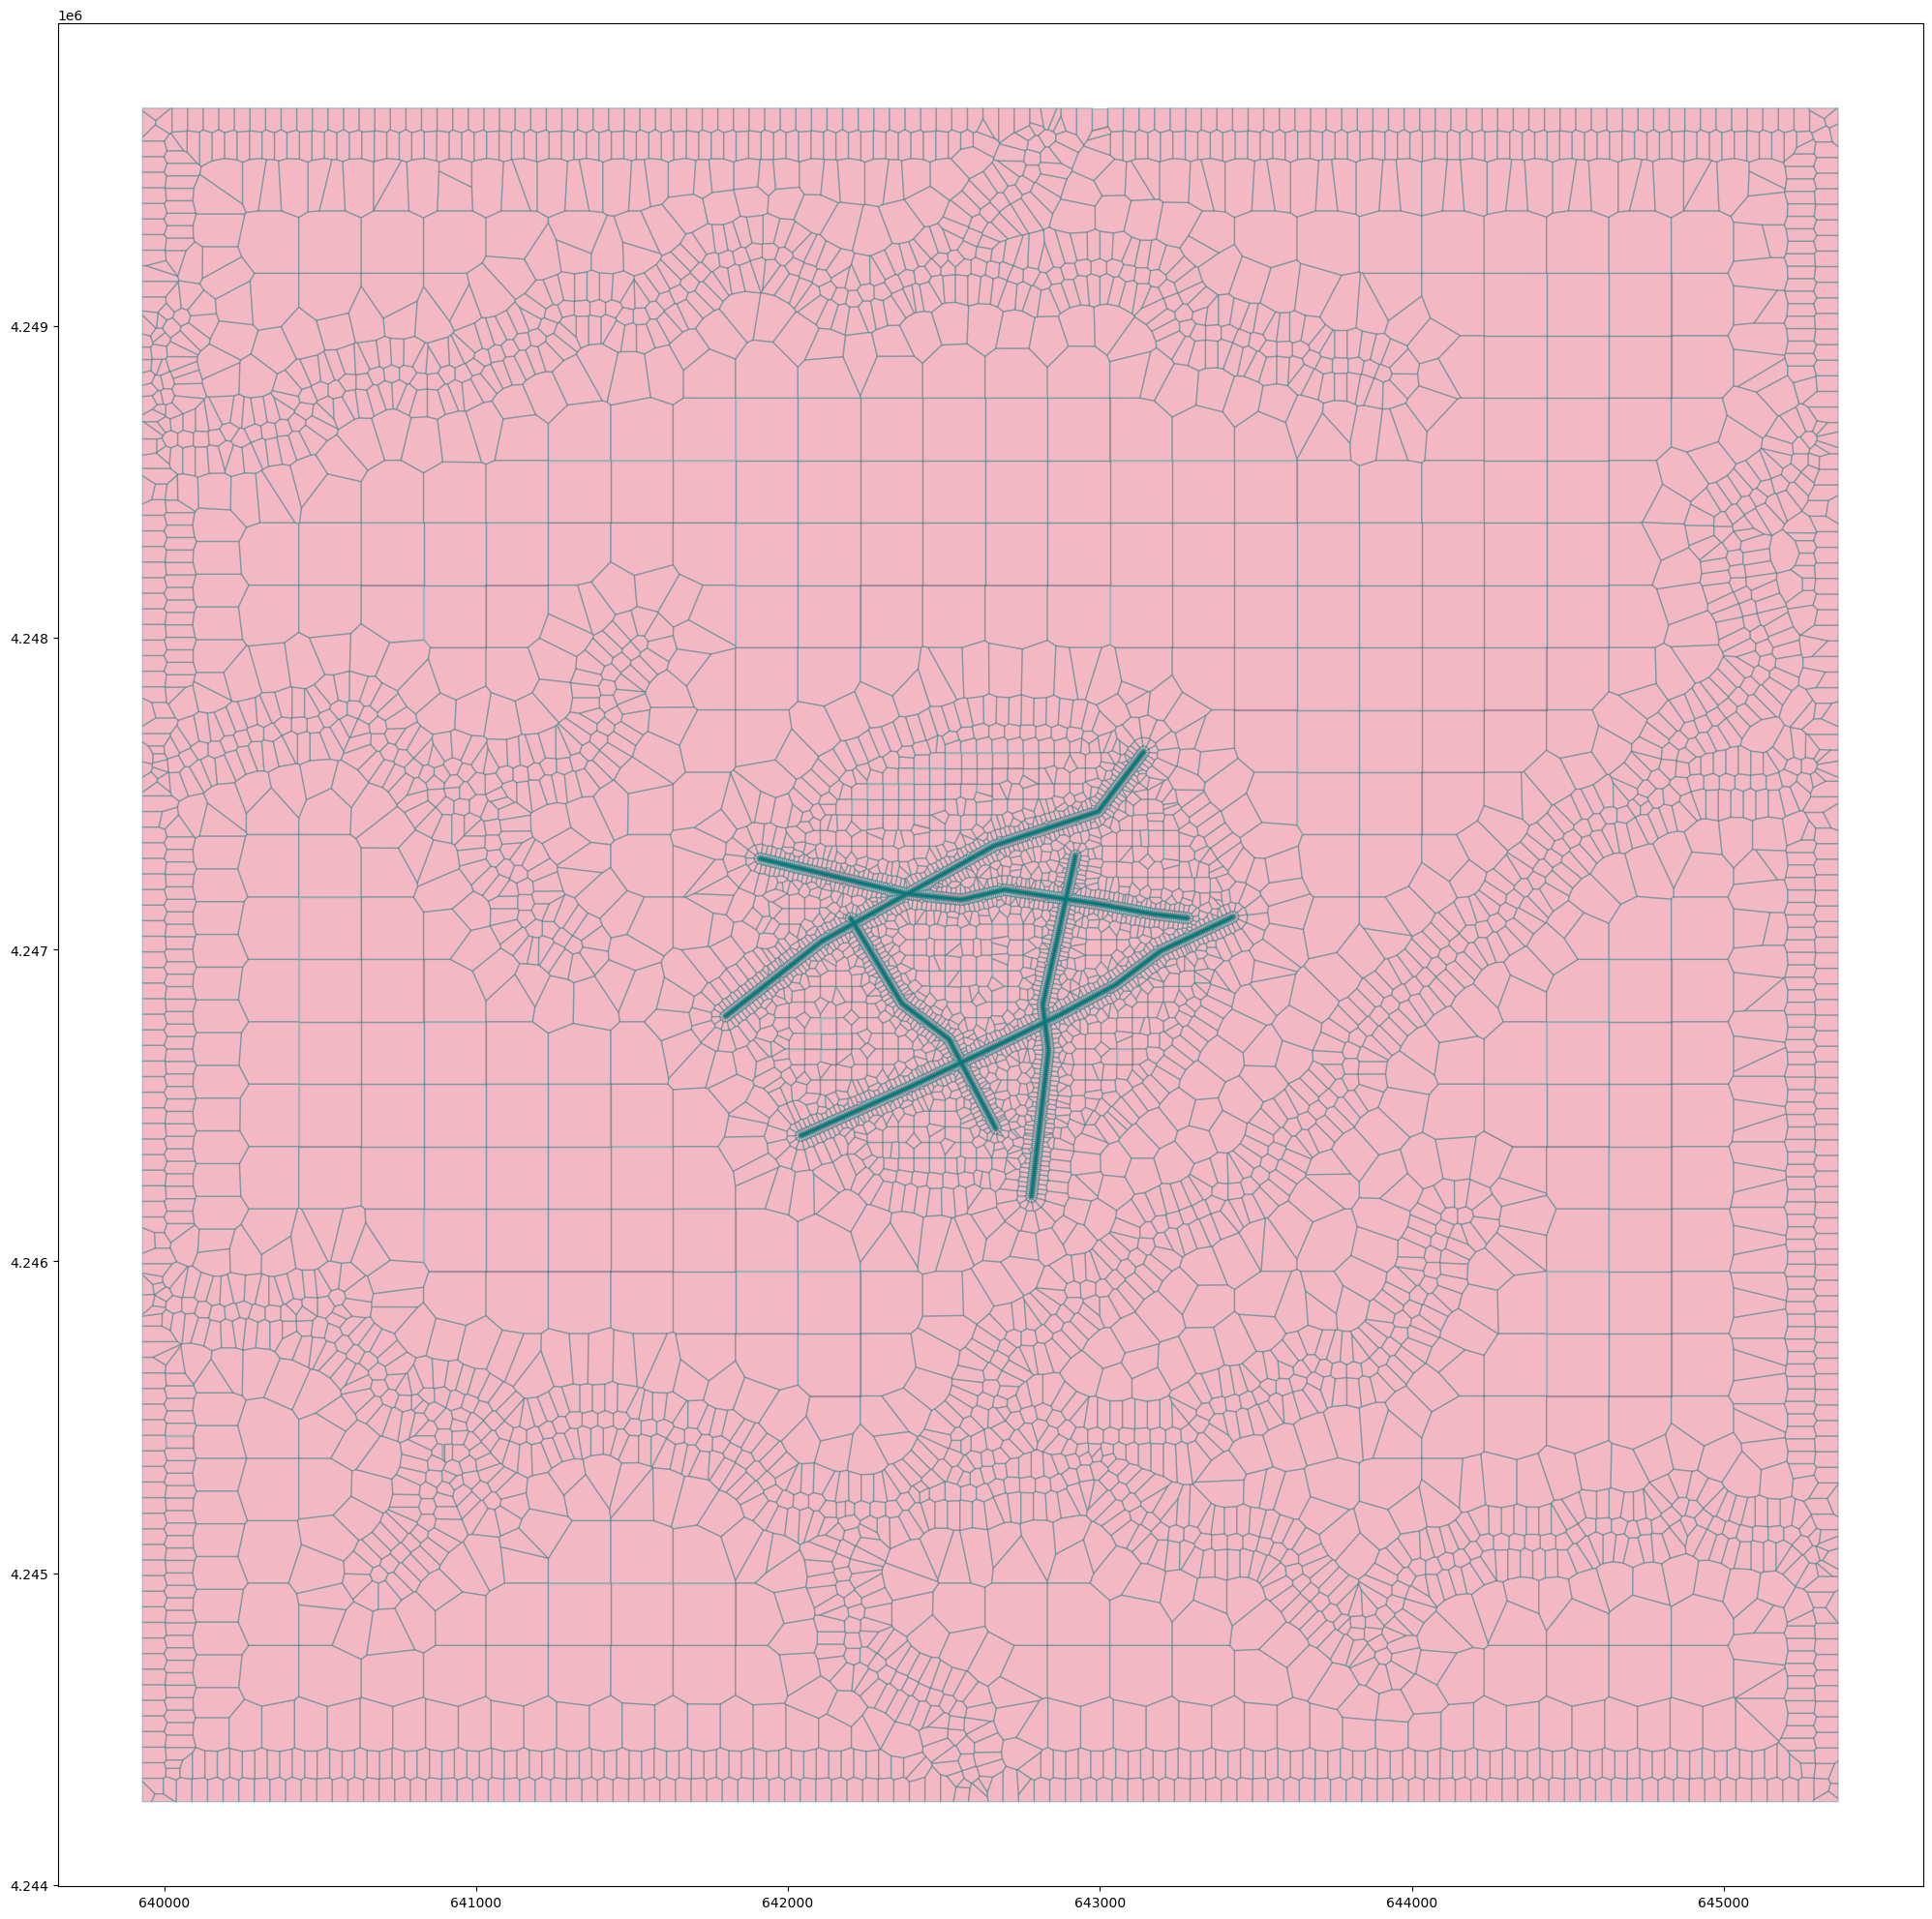

In [8]:
# Show the resulting voronoi mesh

#open the mesh file
mesh=gpd.read_file('../output/'+vorMesh.modelDis['meshName']+'.shp') ## Org
#plot the mesh
mesh.plot(figsize=(35,25), fc='crimson', alpha=0.3, ec='teal') ## Org

## Part 2 generate disv properties

In [9]:
# open the mesh file
mesh=meshShape('../output/'+vorMesh.modelDis['meshName']+'.shp') ## Org

In [10]:
# get the list of vertices and cell2d data
gridprops=mesh.get_gridprops_disv() ## Org


Creating a unique list of vertices [[x1,y1],[x2,y2],...]


100%|██████████| 35685/35685 [00:01<00:00, 20013.11it/s]



Extracting cell2d data and grid index


100%|██████████| 35685/35685 [00:11<00:00, 3072.65it/s]


In [11]:
#create folder
initiateOutputFolder('../json') ## Org

#export disv
mesh.save_properties('../json/disvDict.json') ## Org

The output folder ../json exists and has been cleared
